<img src="./Images/HW07_P02.png" width="700px">
<img src="./Images/HW07_P02(what_to_include).png" width="700 px">

In [1]:
# import dependencies 
import matplotlib.pyplot as plt 
import numpy as np

# Set size parameters for plots 
plt.rcParams.update({
    'figure.titlesize': 18,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 11
})

<img src="./Images/HW07_P02(1).png" width="700px">


In [2]:
# ---- Program to solve the stationary Schrödinger equation using FDM for V(x) ---- 
def solve_SSE(Vp, xmin, xmax, n):
    ''' 
    Function to solve stationary Schrödinger equation for a given potential V(x)
    Arguments: 
        Vp: potential (function)
        xmin: minimum x value, left end-point
        xmax: maximum x value, right end-point
        n: number of endpoints
    Returns: 
        x: set of grid points
        y: eigenvectors 
        Ei: diagonal matrix of eigenvalues 
        n_states: number of bound states
    '''
    # --- create grid ---
    h = (xmax - xmin) / (n-1)   # spacing
    x = np.linspace(xmin, xmax, n)  # grid points 
    V_vals = Vp(x)  # potential points on grid 

    # --- create matrix A ---
    A = np.zeros((n,n))     # init to all zeros 

    # diagonal values: 1/h^2 + V(x_k)
    for k in range(n):
        A[k,k] = 1.0/h**2 + V_vals[k]

    # off diagonals: -1/(2h^2)
    for k in range(n-1):
        A[k, k+1] = -1.0/(2.0*h**2)
        A[k+1, k] = A[k, k+1]

    # --- Eigenvalues and Eigenvectors ---
    Ei, y = np.linalg.eigh(A)   # Ei = sorted list of eigenvals, y = ith eigenfunction

    # sort ascending - eigh should sort automatically, but sort to be sure. 
    ind = np.argsort(Ei)
    Ei = Ei[ind]
    y = y[:,ind]

    # --- Count bound states (Ei < V(xmax)) ---
    Emax = Vp(xmax)
    n_states = 0
    for k in range(n):
        if Ei[k] > Emax: 
            break
        n_states += 1

    # -- Normalization with Simpson's Rule ---
    # S[i] holds norm factor for state i 
    S = np.zeros(n_states)

    # Simpson rule for each bound state
    for i in range(n_states):
        S_i = 0.0
        for k in range(1, n-1, 2): 
            S_i += 4.0 * y[k, i]**2 
            S_i += 2.0 * y[k+1, i]**2 

        S_i += y[0, i]**2 -y[n-1, i]**2 

        S[i] = np.sqrt(S_i * h/3.0)

    # apply normalization 
    for i in range(n_states):
        y[:, i]/=S[i]

    return x, y, Ei, n_states

<img src = "./Images/HW07_p02(2).png" width="700px">

Bound state energies:
1: 0.222825
2: 0.882914
3: 1.947982
4: 3.314261


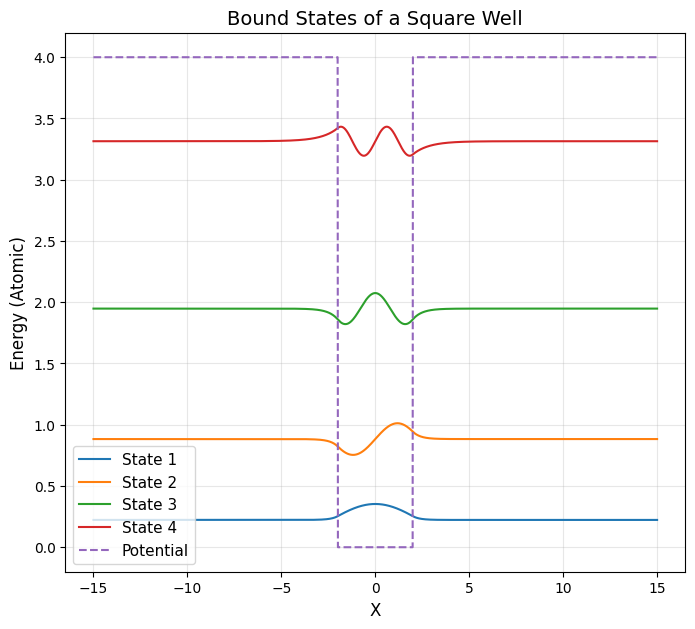

In [76]:
# ---- Square well potential ---- 
def V(x, a=2, V0=4): 
    ''' 
    Finite square well potential: 
    V = 0 inside well, |x| <= a 
    V = V0 outsize 
    '''
    return np.where(np.abs(x) <= a, 0.0, V0)

x, y, Ei, n_states = solve_SSE(V,-15, 15, 2000) 

print("Bound state energies:")
for i in range(n_states):
    print(f"{i+1}: {Ei[i]:.6f}")

plt.figure(figsize=(8,7))
plt.title("Bound States of a Square Well")
plt.xlabel("X")
plt.ylabel("Energy (Atomic)")
scale = 0.2
for i in range(n_states): 
    plt.plot(x, y[:, i] * scale + Ei[i], label=f"State {i+1}")
plt.plot(x, V(x), '--', label="Potential")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)

plt.show()


<img src="./Images/HW07_P02(3).png" width="700px">

In [64]:
# ---- Increasing well depth ---- 

V10 = lambda x: V(x, V0=10)
V100 = lambda x: V(x, V0=100)
V1000 = lambda x: V(x, V0=1000)
V10000 = lambda x: V(x, V0=10000)
V1e5 = lambda x: V(x, V0=1e5)
V1e6 = lambda x: V(x, V0=1e6)

x10, y10, E10, n_states10 = solve_SSE(V10, -15, 15, 2000)
x100, y100, E100, n_states100 = solve_SSE(V100, -15, 15, 2000)
x1000, y1000, E1000, n_states1000 = solve_SSE(V1000, -15, 15, 2000)
x10000, y10000, E10000, n_states10000 = solve_SSE(V10000, -15, 15, 2000)
x1e5, y1e5, E1e5, n_states1e5 = solve_SSE(V1e5, -15, 15, 2000)
x1e6, y1e6, E1e6, n_states1e6 = solve_SSE(V1e6, -15, 15, 2000)

E_inf = [(n**2)*np.pi**2/(32) for n in range(1, 5)]

Analytic infinite well energies: 
n = 1:  E = 0.308425
n = 2:  E = 1.233701
n = 3:  E = 2.775826
n = 4:  E = 4.934802

--- V0 = 10 ---
n = 1:  E = 0.250171
n = 2:  E = 0.998007
n = 3:  E = 2.234573
n = 4:  E = 3.941075

--- V0 = 100 ---
n = 1:  E = 0.288713
n = 2:  E = 1.154701
n = 3:  E = 2.597515
n = 4:  E = 4.616386

--- V0 = 1000 ---
n = 1:  E = 0.302469
n = 2:  E = 1.209831
n = 3:  E = 2.721954
n = 4:  E = 4.838617

--- V0 = 10000 ---
n = 1:  E = 0.306485
n = 2:  E = 1.225898
n = 3:  E = 2.758113
n = 4:  E = 4.902918

--- V0 = 100000 ---
n = 1:  E = 0.307244
n = 2:  E = 1.228935
n = 3:  E = 2.764944
n = 4:  E = 4.915060

--- V0 = 1000000 ---
n = 1:  E = 0.307334
n = 2:  E = 1.229294
n = 3:  E = 2.765752
n = 4:  E = 4.916496


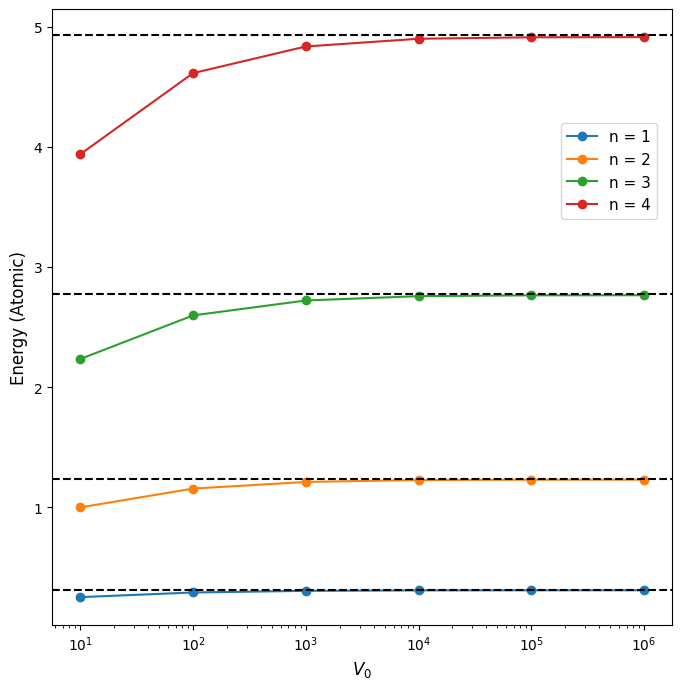

In [75]:

def print_results(Ei, label):
    print(f"\n--- {label} ---")
    for n in range(4):
        print(f"n = {n+1}:  E = {Ei[n]:.6f}")

print("Analytic infinite well energies: ")
for n, E in enumerate(E_inf, start=1):
    print(f"n = {n}:  E = {E:.6f}")

print_results(E10, "V0 = 10")
print_results(E100, "V0 = 100")
print_results(E1000, "V0 = 1000")
print_results(E10000, "V0 = 10000")
print_results(E1e5, "V0 = 100000")
print_results(E1e6, "V0 = 1000000")

Vs = [10, 100, 1000, 10000, 1e5, 1e6]
Es = [E10, E100, E1000, E10000, E1e5, E1e6]

plt.figure(figsize=(8,8))

for i in range(4):
    plt.plot(Vs, [E[i] for E in Es], 'o-', label=f"n = {i+1}")

plt.axhline(E_inf[0], color='k', linestyle='--')
plt.axhline(E_inf[1], color='k', linestyle='--')
plt.axhline(E_inf[2], color='k', linestyle='--')
plt.axhline(E_inf[3], color='k', linestyle='--')

plt.xscale("log")
plt.xlabel(r"$V_0$")
plt.ylabel("Energy (Atomic)")
plt.legend(loc=(0.82, 0.66))
plt.show()

<img src="./Images/HW07_P02(4).png" width="700 px">

In [ ]:
# ---- Harmonic oscillator potential ---- 
